# DESCRIPTION

The dataset provided (from Meuleman et al, 2020) represents summary DNase1 hypersensitivity sites (DHSs), and the NMF components they were assigned to. There are 16 components in total, 15 of which reflect rough cell type assignments, and the last is a component of DHSs shared across the different cell types. Each row is a DHS, while the columns reflect the chromosomal location of the summary DHS, number of samples which fall into that component, the strength of the positioning of the DHS across cell types (aka the total signal), whether the sample was assigned to the component determined for that DHS, etc.

In [1]:
import os

# data transformation
import numpy as np
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set working directory for dataset import. In my case, dataset was processed on a remote server.
os.chdir("/cluster/projects/scottgroup/people/steven/other/PMCC_AI_technical_assignment/datasets/")

Data preprocessing was performed according to instructions in https://github.com/pinellolab/DNA-Diffusion/tree/main/notebooks (master_dataset.ipynb and filter_master.ipynb).

In [3]:
# open dataset
master_dataset = pd.read_feather('./master_dataset.ftr')

In [4]:
# assess structure of master_dataset
master_dataset

,dhs_id,chr,start,end,DHS_width,summit,numsamples,total_signal,component,proportion,...,fKidney_ENCLB005SRL,fKidney_ENCLB704GMQ,fKidney_ENCLB759USM,fLung_ENCLB594BSZ,fKidney_ENCLB049MNH,fUmbilical_cord_ENCLB771UER,fBone_femur_ENCLB236BWV,fLiver_ENCLB638FEH,fPlacenta_ENCLB423VBC,fPlacenta_ENCLB711ZZZ
0,chr1_16140_16200_16170,chr1,16140,16200,60,16170,1,0.129388,1,0.855153,...,0,0,0,0,0,0,0,0,0,0
1,chr1_51868_52040_51970,chr1,51868,52040,172,51970,1,0.080034,7,0.973545,...,0,0,0,0,0,0,0,0,0,0
2,chr1_57280_57354_57350,chr1,57280,57354,74,57350,4,1.093002,8,1.000000,...,0,0,0,0,0,0,0,0,0,0
3,chr1_66370_66482_66430,chr1,66370,66482,112,66430,8,1.469725,3,0.332213,...,0,0,0,0,0,0,0,0,0,0
4,chr1_79100_79231_79150,chr1,79100,79231,131,79150,2,0.226098,7,0.501840,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591893,chrY_56882540_56882719_56882610,chrY,56882540,56882719,179,56882610,1,0.038079,5,0.803229,...,0,0,0,0,0,0,0,0,0,0
3591894,chrY_56882864_56882980_56882930,chrY,56882864,56882980,116,56882930,1,0.115489,5,0.742349,...,0,0,0,0,0,0,0,0,0,0
3591895,chrY_56883733_56883960_56883830,chrY,56883733,56883960,227,56883830,5,2.456885,7,0.559734,...,0,0,0,0,0,0,0,0,0,0
3591896,chrY_56884440_56884580_56884510,chrY,56884440,56884580,140,56884510,1,0.053759,5,0.803229,...,0,0,0,0,0,0,0,0,0,0


- All data, last 733 columns are the component the cell type was assigned to.
- Rows = Indexed DNAse hypersensitivity sites, columns = chromosomal locations of DHS, components from NMF, etc

## Question 1: What proportion of cell types fit into each component? Are there cell types overrepresented in the dataset? 
REASONING: This may impact the ability to model the sequence specificity of the components (aka the cell types). Will we get better performance with predicting cell-type specificity of sequences from more represented cell types?

In [7]:
# columns from the original dataset
master_dataset.columns.tolist() # length is 744, as expected

['dhs_id',
 'chr',
 'start',
 'end',
 'DHS_width',
 'summit',
 'numsamples',
 'total_signal',
 'component',
 'proportion',
 'sequence',
 'GM06990_ENCLB435ZZZ',
 'HepG2_ENCLB480ZZZ',
 'hTH1_ENCLB591ZZZ',
 'Hela_ENCLB479ZZZ',
 'CACO2_ENCLB422ZZZ',
 'CACO2_ENCLB423ZZZ',
 'SKNSH_ENCLB585ZZZ',
 'SKNSH_ENCLB586ZZZ',
 'HMEC_ENCLB493ZZZ',
 'GM12878_ENCLB441ZZZ',
 'MCF7_ENCLB554ZZZ',
 'K562_ENCLB539ZZZ',
 'K562_ENCLB540ZZZ',
 'PANC1_ENCLB573ZZZ',
 'PANC1_ENCLB574ZZZ',
 'HeLaS3_ENCLB478ZZZ',
 'BJ_ENCLB416ZZZ',
 'HUVEC_ENCLB533ZZZ',
 'BJ_ENCLB417ZZZ',
 'HESC_ENCLB442ZZZ',
 'SAEC_ENCLB581ZZZ',
 'SAEC_ENCLB582ZZZ',
 'HRE_ENCLB523ZZZ',
 'HRE_ENCLB524ZZZ',
 'HRCE_ENCLB521ZZZ',
 'HRCE_ENCLB522ZZZ',
 'GM12878_ENCLB440ZZZ',
 'Jurkat_ENCLB537ZZZ',
 'hTH17_ENCLB597ZZZ',
 'CD34_ENCLB346ADI',
 'NHEK_ENCLB567ZZZ',
 'NHEK_ENCLB568ZZZ',
 'HConF_ENCLB470ZZZ',
 'HConF_ENCLB471ZZZ',
 'CD34_ENCLB884BTD',
 'HL60_ENCLB490ZZZ',
 'HGF_ENCLB486ZZZ',
 'HGF_ENCLB487ZZZ',
 'IMR90_ENCLB611WZP',
 'IMR90_ENCLB675EPB',
 'HL60

Sample metadata was obtained from https://www.meuleman.org/DHS_Index_and_Vocabulary_metadata.tsv

In [5]:
# import sample metadata
DHS_metadata = pd.read_table("DHS_Index_and_Vocabulary_metadata.tsv")

In [9]:
display(DHS_metadata)
display(DHS_metadata.columns.tolist())

,library order,Biosample name,Vocabulary representative,DCC Experiment ID,DCC Library ID,DCC Biosample ID,DCC File ID,Altius Aggregation ID,Altius Library ID,Altius Biosample ID,...,Library cleanup,DNaseI units/mL,Amount Nucleic Acid (ng),Nuclei count,Protease inhibitor,Library sequencing date,Reads used,DCC SPOT score,Per-biosample peaks,DHSs in Index
0,1.0,GM06990,NaN,ENCSR000EMQ,ENCLB435ZZZ,ENCBS057ENC,ENCFF983CTQ,AG5636,LN1203,DS7748,...,Sucrose,NaN,50,NaN,NaN,2009-02-23,142681590.0,0.6790,83639.0,82918.0
1,2.0,HepG2,NaN,ENCSR000ENP,ENCLB480ZZZ,ENCBS114ENC,ENCFF419JVG,AG5635,LN1207,DS7764,...,Sucrose,NaN,50,NaN,NaN,2009-02-23,138826342.0,0.5858,89748.0,89235.0
2,3.0,hTH1,NaN,ENCSR000EQC,ENCLB591ZZZ,ENCBS345AAA,ENCFF575KOF,AG5634,LN1222,DS7840,...,Sucrose,6.0,534.9,NaN,NaN,2007-06-06,149158633.0,0.6470,94360.0,93665.0
3,4.0,Hela,NaN,ENCSR000ENO,ENCLB479ZZZ,ENCBS890POO,ENCFF503PAE,AG4219,LN1264,DS8200,...,new Sucrose,4.0,50,NaN,NaN,2007-08-24,23372724.0,0.6444,59098.0,59024.0
4,5.0,CACO2,NaN,ENCSR000EMI,ENCLB422ZZZ,ENCBS391ENC,ENCFF977BRD,AG4218,LN1269,DS8235,...,Sucrose,8.0,1,NaN,NaN,2007-09-05,22760059.0,0.7190,29894.0,29724.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,730.0,fBone_femur,Musculoskeletal,ENCSR805XIF,ENCLB236BWV,ENCBS337FPV,ENCFF604WIO,AG7442,LN45038B,DS36206B,...,NaN,NaN,8.8,1050000.0,A+Sucrose,2017-02-17,252066174.0,0.5823,146918.0,145356.0
730,731.0,fLiver,NaN,ENCSR562FNN,ENCLB638FEH,ENCBS275VNY,ENCFF795ZXN,AG7443,LN45070C,DS37372C,...,NaN,NaN,4.48,2140000.0,A+Sucrose,NaN,190541422.0,0.3703,76639.0,75369.0
731,732.0,fPlacenta,NaN,ENCSR552RKI,ENCLB423VBC,ENCBS565KNL,ENCFF084UVH,AG8805,LN45072C,DS37386C,...,NaN,NaN,1.325,1050000.0,A+Sucrose,NaN,203699532.0,0.3869,107611.0,106022.0
732,733.0,fPlacenta,Placental / trophoblast,ENCSR552XJI,ENCLB711ZZZ,ENCBS723HLT,ENCFF593AWN,AG7450,LN45076C,DS37716C,...,NaN,NaN,0.972,1380000.0,A+Sucrose,NaN,206456483.0,0.4356,115898.0,114344.0


['library order',
 'Biosample name',
 'Vocabulary representative',
 'DCC Experiment ID',
 'DCC Library ID',
 'DCC Biosample ID',
 'DCC File ID',
 'Altius Aggregation ID',
 'Altius Library ID',
 'Altius Biosample ID',
 'Replicate indicators',
 'System',
 'Subsystem',
 'Organ',
 'Biosample type',
 'Biological state',
 'Germ layer',
 'Description ',
 'Growth stage',
 'Age',
 'Sex',
 'Ethnicity',
 'Donor ID',
 'Unique cellular condition',
 'Used in Figure 1b',
 'Biosample protocol',
 'Experiment protocol',
 'Library kit method',
 'Library cleanup',
 'DNaseI units/mL',
 'Amount Nucleic Acid (ng)',
 'Nuclei count',
 'Protease inhibitor',
 'Library sequencing date',
 'Reads used',
 'DCC SPOT score',
 'Per-biosample peaks',
 'DHSs in Index']

## Frequency of samples of each organ type in the dataset

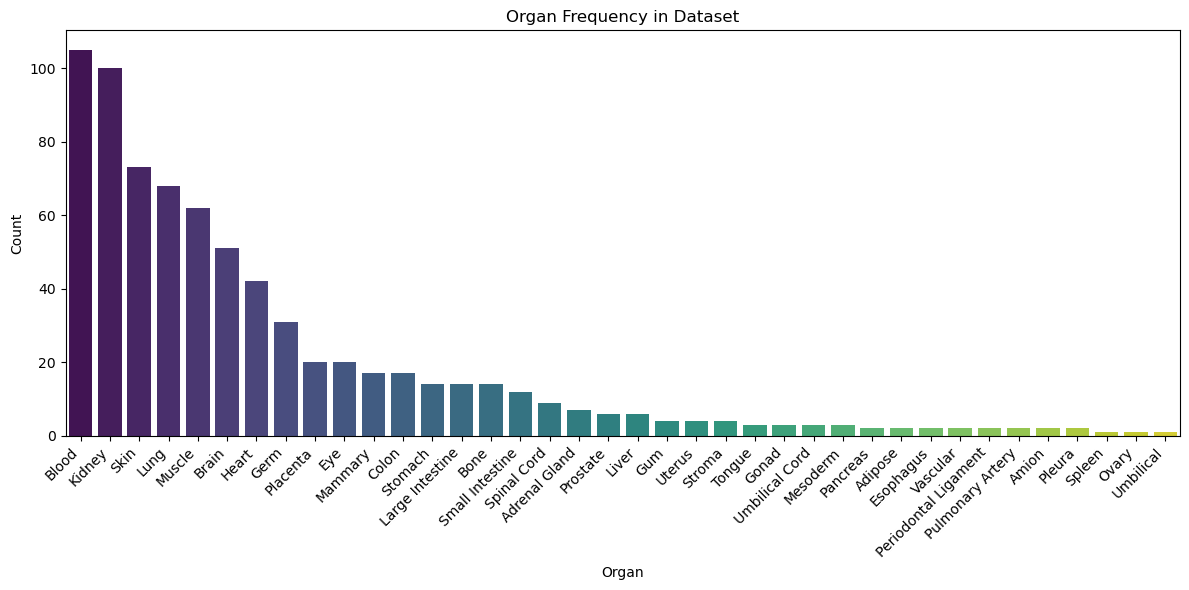

In [18]:
# number of samples per organ
organ_counts = DHS_metadata['Organ'].value_counts()

# convert to data frame, and rename columns
organ_counts_df = organ_counts.reset_index()
organ_counts_df.columns = ['Organ', 'Count']

# present this data as a bar plot
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Organ', y = 'Count', data = organ_counts_df, palette='viridis') # visualization using seaborn
plt.title('Organ Frequency in Dataset')
plt.xlabel('Organ')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels, align to right to prevent overlap
plt.tight_layout()
plt.show()

There is a bias towards DHSs derived from blood, kidney, skin, etc. This may influence the ability for a model to predict DHS sequence specificity from less represented tissue types like ovary, umbilical, etc.

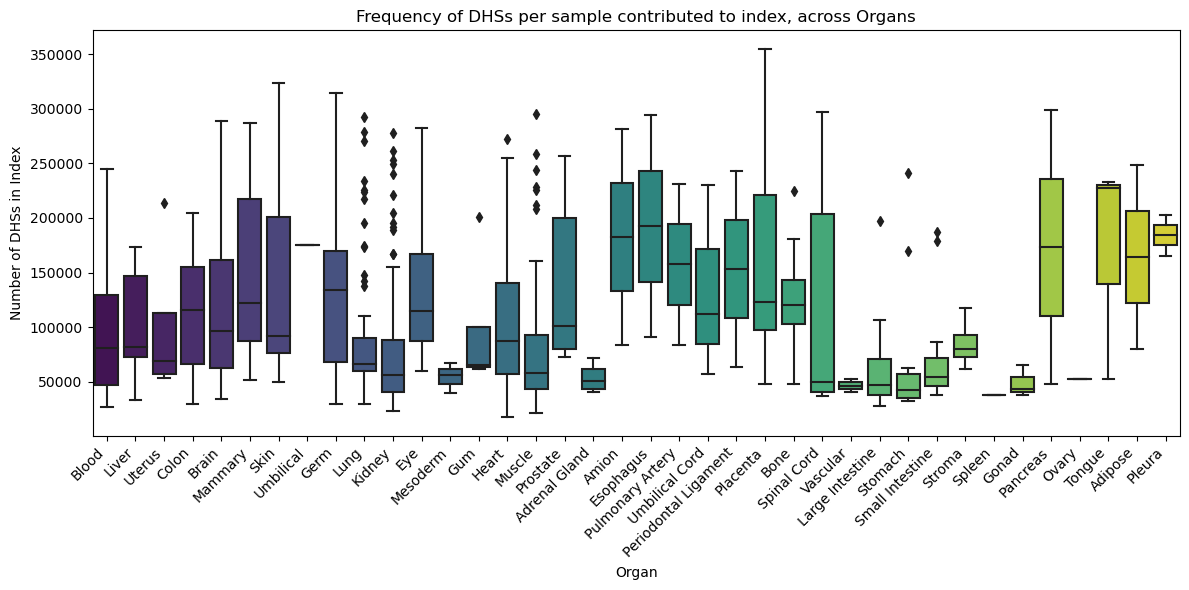

In [20]:
# plot the DHSs in Index, see if the distribution looks similar to the distribution of tissue types

# Sort the DataFrame by the median of 'DHSs in Index' in descending order. Obtain the index for this sort.
DHS_metadata_sorted = DHS_metadata.groupby('Organ')['DHSs in Index'].median().sort_values(ascending = False).index

# boxplot of DHSs in Index, categorized by the tissue type
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Organ', y = 'DHSs in Index', data = DHS_metadata, palette='viridis') # no ordering by median of 'DHSs in Index'
# sns.boxplot(x = 'Organ', y = 'DHSs in Index', data = DHS_metadata, order = DHS_metadata_sorted, palette='viridis') # ordering by median of 'DHSs in Index'
plt.title('Frequency of DHSs per sample contributed to index, across Organs')
plt.xlabel('Organ')
plt.ylabel('Number of DHSs in Index')
plt.xticks(rotation = 45, ha = 'right')  # Rotate x-axis labels, align to right to prevent overlap
plt.tight_layout()
plt.show()

Frequency of DHSs contributed to index does not trend with the tissue type sample frequency in the dataset.

## Number of DHSs in each NMF component

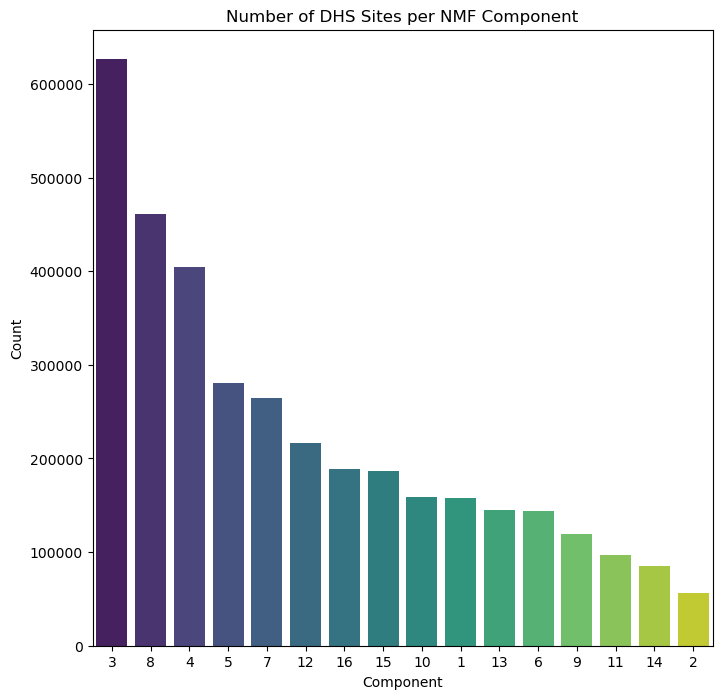

In [44]:
# QUESTION; how many DHSs are in each NMF conponent?
# Rationale; does the number of DHSs expected in each component reflect the biology of the cell type represented by the component?
component_counts = master_dataset['component'].value_counts().reset_index()

# sort the components by descending counts, to identify components with the most DHSs
component_counts_sorted = component_counts.sort_values(by = 'count', ascending = False)
component_counts_sorted

# plot as bar plot. Sort bars by descending count.
plt.figure(figsize = (8, 8))
sns.barplot(x = 'component', y = 'count', data = component_counts, order = component_counts_sorted['component'], palette = 'viridis')
plt.xlabel('Component')
plt.ylabel('Count')
plt.title('Number of DHS Sites per NMF Component')
plt.show()

Components sorted by the number of DHSs within them do not trend with the most represented cell types. They seem to be descending by differentiation status. For instance, the component with the most DHSs (Component 3) represents human embryonic stem cells (hESC), expected to have the most accessible chromatin, and therefore the most DHSs. The assumption being, that abundance of accessible chromatin decreases with increased differentiation from stem cell states (Aughey et al, 2018, https://doi.org/10.7554/eLife.32341). Meanwhile, more differentiated cells typically have less accessible chromatin overall. To confirm this within the components would require more validation, but it seems like there are biological trends in the components. Reinforcing that it may be useful to use the components as the label for the foundation model predictions.

# Question 2: Is there cell type sequence specificity in the DHS sequences, for the components generated in the dataset (Meuleman et al, 2020)
REASONING: Do the sequences of the DHSs predict the components? Or are there other patterns represented in the sequence data? Can the DHS sequences be used to further refine cell type classes?

# ATTEMPT 1: Utilize DNABERT to predict the components from NMF (representing the predicted cell types) using input DHS sequences
Load pre-trained model (DNABERT)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

In [ ]:
# for model downloaded locally (DNABERT-6). Model was unzipped prior.
model_path = "/cluster/projects/scottgroup/people/steven/other/PMCC_AI_technical_assignment/datasets/6-new-12w-0/"

tokenizer = AutoTokenizer.from_pretrained(model_path, local_files_only = True, cache_dir = model_path)
model = AutoModel.from_pretrained(model_path, local_files_only = True, cache_dir = model_path)

## Check to ensure the model is generating the desired output

In [ ]:
# Example: Calculate the embedding of a DNA sequence
dna_sequence = "ACGTAGCATCGGATCTATCTATCGACACTTGGTTATCGATCTACGAGCATCTCGTTAGC"
inputs = tokenizer(dna_sequence, return_tensors="pt")["input_ids"]
hidden_states = model(inputs)[0]  # [1, sequence_length, 768]

# Embedding with mean pooling
embedding_mean = torch.mean(hidden_states[0], dim=0)
print(embedding_mean.shape)  # Expecting (768)

# Embedding with max pooling
embedding_max = torch.max(hidden_states[0], dim=0)[0]
print(embedding_max.shape)  # Expecting (768)

In [6]:
'K562_ENCLB843GMH' in master_dataset.columns.tolist()

True

Model is functional

## Remove test samples from master_dataset

In [5]:
# import test set
test_df = pd.read_feather('./test_df.ftr')
test_df

,index,dhs_id,chr,start,end,DHS_width,summit,numsamples,total_signal,component,proportion,sequence,K562_ENCLB843GMH,hESCT0_ENCLB449ZZZ,HepG2_ENCLB029COU,GM12878_ENCLB441ZZZ,TAG,additional_replicates_with_peak,other_samples_with_peak_not_considering_reps
0,0,chr14_92895527_92895734_92895650,chr14,92895527,92895734,207,92895650,2,2.416560,1,0.508887,TCTATTTGTCAGGGTTTTCTTAGCATTAGTGACTCCATTTTGATTC...,0,0,0,1,GM12878_ENCLB441ZZZ,1,0
1,1,chr16_84088800_84089180_84088970,chr16,84088800,84089180,380,84088970,2,5.172340,1,0.508887,ACTTCAACAGCCAGCAGGTGGCCAGGTCTGTGTGAGGCAGCATGAG...,0,0,0,1,GM12878_ENCLB441ZZZ,1,0
2,2,chr17_63517040_63517143_63517070,chr17,63517040,63517143,103,63517070,2,1.419430,1,0.508887,TGGGATGTTTGACCTCAGTCATTTTCACCACTTCCCACGCTCACCC...,0,0,0,1,GM12878_ENCLB441ZZZ,1,0
3,3,chr5_95617159_95617377_95617270,chr5,95617159,95617377,218,95617270,2,4.345460,1,0.508887,CAACATGTCCAGACAGAATCTGCATGACTCAAATAAGGAGTACAAT...,0,0,0,1,GM12878_ENCLB441ZZZ,1,0
4,4,chr5_151721128_151721540_151721390,chr5,151721128,151721540,412,151721390,2,8.542410,1,0.508887,GTCCTGCTATAAGTTGCTGGTCACGTCAAGTAAATCTCTCAGCCTC...,0,0,0,1,GM12878_ENCLB441ZZZ,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47867,3401008,chr8_126896456_126896661_126896570,chr8,126896456,126896661,205,126896570,28,37.299535,3,0.963907,GCAATGTCAGAAACTTTCTCAGAATGTCCTTACCTCAGGGAAGTTT...,0,1,0,0,hESCT0_ENCLB449ZZZ,1,26
47868,3401009,chr9_3696460_3696670_3696570,chr9,3696460,3696670,210,3696570,28,25.788172,3,0.736287,ACCAGGGAACTATTAAGCTTCCCCCTAAGGGAACCATTTACGACCA...,0,1,0,0,hESCT0_ENCLB449ZZZ,1,26
47869,3401010,chr9_27308820_27309020_27308910,chr9,27308820,27309020,200,27308910,28,39.675546,3,0.762043,CCTTAGTTAAGGGCCCCTGATGAGGAGGCCTACAAATGGTGACACC...,0,1,0,0,hESCT0_ENCLB449ZZZ,1,26
47870,3401011,chr9_32128620_32128839_32128730,chr9,32128620,32128839,219,32128730,28,18.881510,3,0.984035,CTGCTTAGGCCTGCTGAGTTCCCTGGGGGAGGGGCAGCTGCCTGCT...,0,1,0,0,hESCT0_ENCLB449ZZZ,1,26


In [6]:
# Remove the samples from the master dataset for fine tuning of the model. 
# To prevent learning of the test data. Re-use the function later if required.
cell_list = ['K562_ENCLB843GMH', 'hESCT0_ENCLB449ZZZ', 'HepG2_ENCLB029COU', 'GM12878_ENCLB441ZZZ']

def remove_columns(df, columns_to_remove):
    """Remove columns from DataFrame by name."""
    return df.drop(columns = columns_to_remove, errors = 'ignore')

# Remove columns from master_dataset
master_dataset = remove_columns(master_dataset, cell_list)

# check to ensure test data is removed from master_dataset
cell_list in master_dataset.columns.tolist() # should be false

False

## Convert sequences to kmer = 6, using the 'sequence' from master_dataset as input, and 'component' as the class label
kmer = 6 was used first, as this yielded the best results from the original publication (https://doi.org/10.1093/bioinformatics/btab083)

In [15]:
# convert sequence data to kmer = 6, for model fine-tuning. Code from https://github.com/jerryji1993/DNABERT/blob/master/motif/motif_utils.py
def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space

    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers

In [81]:
# Input sequences are converted to str class. x number of random features were selected to confirm whether the DNABERT software was working.
master_dataset_subset = master_dataset['sequence'].sample(n = 100, random_state = 2)

In [ ]:
# Initialize an empty list to store the sequences and labels
tokenized_seq = []

# use seq2kmer to tokenize the input data.
for index in master_dataset_subset.index:
    seq = master_dataset_subset.loc[index]
    kmer = seq2kmer(seq, 6)

    # Append the sequence and label to the tokenized_seq list
    tokenized_seq.append({'sequence': kmer, 'label': master_dataset['component'].loc[index]})
    
# Create a DataFrame from the list
tokenized_seq = pd.DataFrame(tokenized_seq)

tokenized_seq

In [84]:
# save tokenized sequences and labels to file for model input
tokenized_seq.to_csv('tokenized_seq_training.txt', sep='\t', index=False)

Issues were encountered with dependencies in the conda environment, related to the outdated Python version (3.6). Since the issues could not be navigated, the workflow was shifted to DNABERT-2, which uses a more up-to-date version of Python. Also, more user friendly and has a built-in tokenizer for DNA sequences.

# ATTEMPT 2: Due to package dependency issues with DNABERT, workflow was shifted over to DNABERT-2

In [ ]:
# export train and test as train.csv, test.csv, and dev.csv.
# if there was more time, I would split a separate dev and test set.

train = master_dataset[['sequence', 'component']]
test = test_df[['sequence', 'component']]
dev = test_df[['sequence', 'component']]

# change second column name to label
train.columns = ['sequence', 'label']
test.columns = ['sequence', 'label']
dev.columns = ['sequence', 'label']

train

In [ ]:
# save all to csv
os.chdir("/cluster/projects/scottgroup/people/steven/other/PMCC_AI_technical_assignment/datasets/dnabert_2_train_test/")

train.to_csv('train.csv', sep='\t', index=False)
test.to_csv('test.csv', sep='\t', index=False)
dev.to_csv('dev.csv', sep='\t', index=False)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

In [ ]:
# for model downloaded locally (DNABERT-2-117M). Model was unzipped prior.
model_path = "/cluster/projects/scottgroup/people/steven/other/PMCC_AI_technical_assignment/datasets/dnabert_2_model/"

tokenizer = AutoTokenizer.from_pretrained(model_path, local_files_only = True, trust_remote_code = True, cache_dir = model_path)
model = AutoModel.from_pretrained(model_path, local_files_only = True, trust_remote_code = True, cache_dir = model_path)

## Check to ensure the model is generating the desired output

In [ ]:
# Example: Calculate the embedding of a DNA sequence
dna = "ACGTAGCATCGGATCTATCTATCGACACTTGGTTATCGATCTACGAGCATCTCGTTAGC"

# original code from Github repo
# inputs = tokenizer(dna, return_tensors = 'pt')["input_ids"]
# hidden_states = model(inputs)[0] # [1, sequence_length, 768]

# updated code to 
inputs = tokenizer(dna, return_tensors = 'pt')["input_ids"]
with torch.no_grad():
    hidden_states = model(inputs).last_hidden_state  # [1, sequence_length, 768]

# print("Hidden states shape:", hidden_states.shape)

In [ ]:
# embedding with mean pooling
embedding_mean = torch.mean(hidden_states[0], dim=0)
print(embedding_mean.shape) # expect to be 768

# embedding with max pooling
embedding_max = torch.max(hidden_states[0], dim=0)[0]
print(embedding_max.shape) # expect to be 768

Tests failed, as GPU usage is built into the workflow. No GPU nodes were accessible during project implementation. Attempts were made to modify scripts to use just CPU and RAM, but these attempts were unsuccessful.

# Additional questions to address in this project

1) How many datasets fit into the cell type components from NMF? Does the imbalance of cell types affects the deep learning performance on sequences in specific “underrepresented” components?
   - To address this, we can observe where the misclassifications are highest in the training and test data. If this is consistent between      the two sets, for a subset of components where there were less cell types available, then the lack of data on certain cell types may       be a limitation of the dataset. Expanding the dataset, or pre-balancing the cell types before NMF / deep learning could address this.
3) Are there conserved sequences at DHSs across cell types, or across disease states?
   - Once the issues with the DNABERT software are addressed, we can address this.
   - First, I would model using all data, independent of disease state or cell type.
   - Then, we can split the training set into disease and healthy states, and fine tune on the DHS sequences for the separate sets. We can also balance the test set by disease states. If the prediction accuracy is higher when we separate the healthy models from the disease models, then it may indicate that disease DHSs may be predicted from sequences of DHSs (would require external validation).
5) For sequences which do not predict the cell type components from Meuleman et al, what do they predict? Can we establish more granular categories of cell types (or disease states) represented in the 733 models?
6) Can we use DNABERT trained on DHS sequences to predict whether the models reflect rare cell populations?
   - This question would likely require expansion of the Meuleman et al. dataset to include models from rare cellular populations.
8) Once we address the dominant patterns reflected in sequence specificity of the DHSs, what additional omics data can we use to support the findings (eg// ATAC-Seq, or other measurements of chromatin accessibility published across cell types)?
9) Since epigenetic states are constantly changing, would it be expected that the sequences in the DHSs would also change significantly? Or are there core DNA sequences which may be retained across these epigenetic state changes?